In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

%matplotlib inline

<br/>
<br/>

## 1. 데이터 로드

In [157]:
## 데이터 불러오기

xlsx = pd.read_excel('../../data/Real estate valuation data set.xlsx')
data = xlsx.to_csv('../../data/Real_Estate.csv')
df = pd.read_csv('../../data/Real_Estate.csv')

In [158]:
## 데이터 기본 정보 확인

df
print(df)
print(df.keys())

,Unnamed: 0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...,...
409,409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


     Unnamed: 0   No  X1 transaction date  X2 house age  \
0             0    1          2012.916667          32.0   
1             1    2          2012.916667          19.5   
2             2    3          2013.583333          13.3   
3             3    4          2013.500000          13.3   
4             4    5          2012.833333           5.0   
..          ...  ...                  ...           ...   
409         409  410          2013.000000          13.7   
410         410  411          2012.666667           5.6   
411         411  412          2013.250000          18.8   
412         412  413          2013.000000           8.1   
413         413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450        

<br/>
<br/>

### 변수 정리


- 독립변수 : X1 ~ X6까지 6개 
- 종속변수 : Y house price of unit area

<br/>
<br/>

## 2. EDA작업

In [159]:
# 1. DataFrame 변환
# 1-1 먼저 공백을 제거한 키값(컬럼명)으로 바꾸자. 

df.rename({'X1 transaction date' : 'transaction_date',
           'X2 house age': 'house_age',
           'X3 distance to the nearest MRT station' : 'distance_nearest_MRT',
           'X4 number of convenience stores': 'convenience_stores',
           'X5 latitude' : 'latitude',
           'X6 longitude' : 'longitude',
           'Y house price of unit area' : 'house_price'},
         axis = 1, inplace = True)

df

,Unnamed: 0,No,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...,...
409,409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [160]:
# 2-1. Feature 테이블 만들기 (독립변수 테이블 만들기)

features = df.iloc[:, 2:8]
features

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [161]:
# 2-2. Target 테이블 만들기 (종속변수 테이블 만들기)

targets = pd.DataFrame(df.house_price, columns = ["house_price"])
targets

,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [162]:
# 2-3. features와 targets통합시키기

estate = pd.concat([features, targets], axis = 1)
estate

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [163]:
# 2-4. null값 확인

features.isna().sum(axis = 0)

transaction_date        0
house_age               0
distance_nearest_MRT    0
convenience_stores      0
latitude                0
longitude               0
dtype: int64

In [164]:
# 2-5. 기초통계분석

features.info()
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_date      414 non-null    float64
 1   house_age             414 non-null    float64
 2   distance_nearest_MRT  414 non-null    float64
 3   convenience_stores    414 non-null    int64  
 4   latitude              414 non-null    float64
 5   longitude             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270


In [165]:
# 2-6. 상관분석

corr = features.corr()
corr

corr2 = estate.corr()
corr2
# house_age와 transaction_date 다중공선성 주의

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520
distance_nearest_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000


,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_nearest_MRT,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [166]:
# 2-7. 집계분석

estate.groupby('house_price').size()

house_price
7.6      1
11.2     1
11.6     1
12.2     1
12.8     2
        ..
71.0     1
73.6     1
78.0     1
78.3     1
117.5    1
Length: 270, dtype: int64

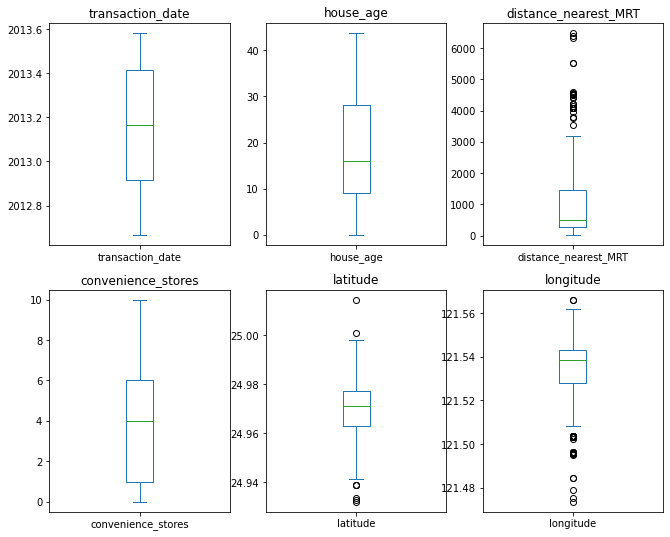

In [167]:
# 2-8. 이상치 탐지 그래프 -boxplot

def boxplot_estate(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9)) #사이즈
    
    for col in features.columns: # X변수에 해당하는 그래프 개수를 그려내자.
        plt.subplot(2,3,i) # 두 줄에 두칸을 만들어서 인덱스 순으로 그려내자.
        plt.axis('on') # 축 표시해라
        plt.tick_params(axis='both',left =True)
        dataset[col].plot(kind='box', subplots=True) # 얘를 통으로 넣어줘도 위에서 feature_names만큼으로 정해서 species안들어온다. # 그래프 선택
        plt.title(col)
        i +=1

    plt.show()
boxplot_estate(estate.columns[:-1],estate)

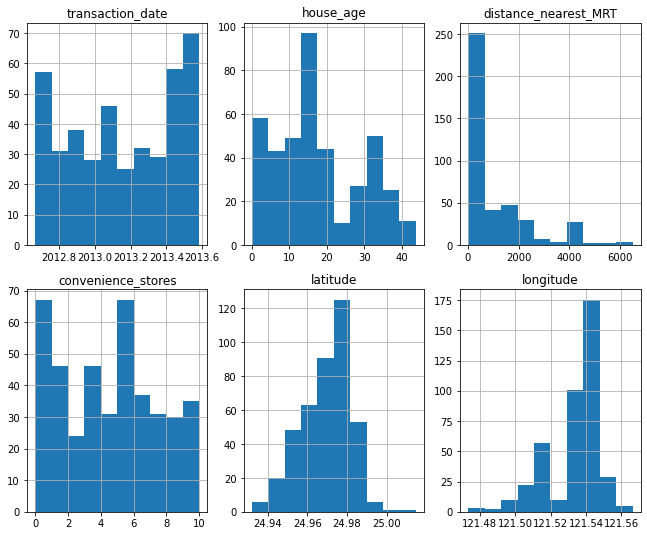

In [168]:
# 2-8-2. 이상치 탐지 그래프 확인 - histogram

def histogram_estate(feature_names, dataset):
    i=1
    plt.figure(figsize=(11,9)) #사이즈
    
    for col in features.columns: # X변수에 해당하는 그래프 개수를 그려내자.
        plt.subplot(2,3,i) # 두 줄에 두칸을 만들어서 인덱스 순으로 그려내자.
        plt.axis('on') # 축 표시해라
        plt.tick_params(axis='both',left =True)
        
        dataset[col].hist()
        plt.title(col)
        i +=1

    plt.show()
histogram_estate(estate.columns[:-1], estate)

<Figure size 792x648 with 0 Axes>

<AxesSubplot:>

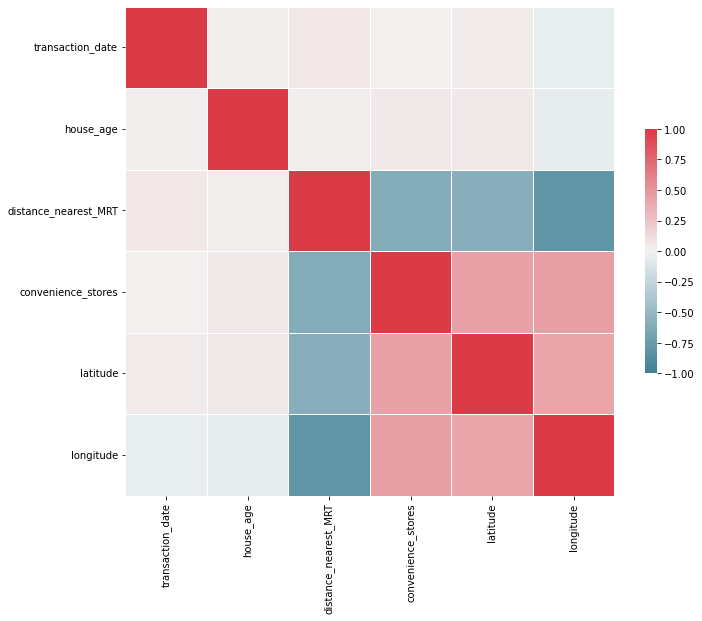

In [169]:
# 2-8-3. 상관관계 시각화

# corr위에 선언되어 있음

cmap = sns.diverging_palette(220, 10, as_cmap = True)

plt.figure(figsize = (11,9))
sns.heatmap(corr, cmap = cmap, vmax = 1.0, vmin = -1.0, center = 0, square = True, linewidths = .5, cbar_kws = {'shrink' : .5})
plt.show()

Text(0.5, 1.0, 'House Price Multivariate Distribution')

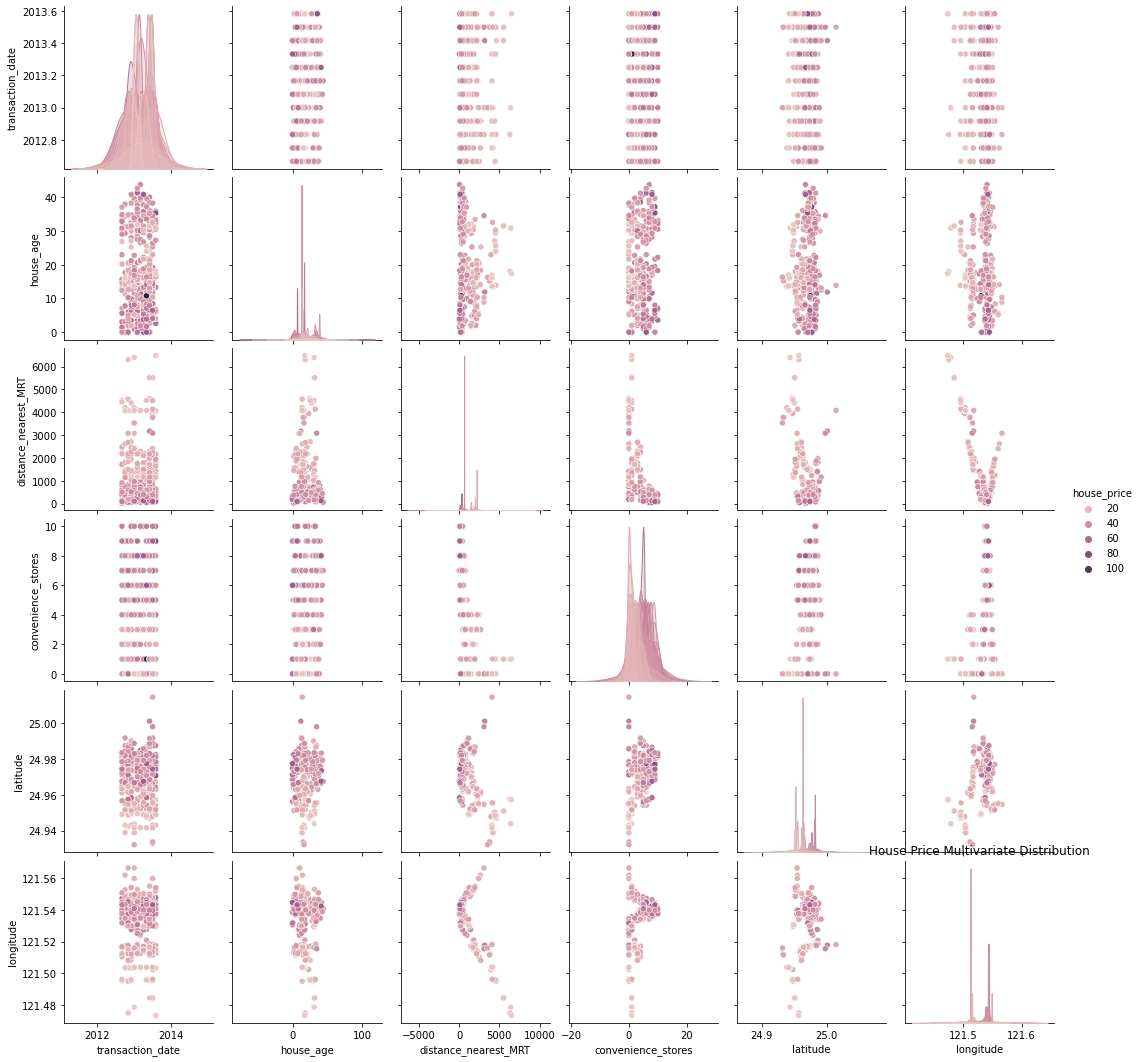

In [170]:
# 2-8-4. 상관관계 시각화 - pairplot

sns.pairplot(estate, hue = 'house_price')
plt.title("House Price Multivariate Distribution")
plt.show()

In [171]:
# 2-9-0. train_test_split위한 타입변경

typech = estate.astype({'house_price' : 'int'})
typech

,transaction_date,house_age,distance_nearest_MRT,convenience_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52


In [172]:
# 2-9 홀드아웃

from sklearn.model_selection import train_test_split

# 사용할 특징량 추출
tych = estate.astype({'house_price' : 'int'})

# transaction_date 컬럼 제외
x = tych.iloc[:,1:5]
y = tych.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

<br/>
<br/>

## 3. 정규화, 일반화

In [173]:
# 3-1. 정규화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())

x_train_std mean :  6.920306621656246e-14
x_train_std std:  1.0
x_test_std mean:  0.02615155757872515
x_test_std std:  1.0096374097002767


In [174]:
# 3-2. 모형 구축

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [175]:
# 3-3. 모형 실행

model.fit(x_train_std, y_train)

LinearRegression()

In [176]:
model.score(x_test_std, y_test)

0.5826556703815733

In [177]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model, x_train_std, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.2025007699696144
1번째 교차 검증 정확도 : 0.5143902714878521
2번째 교차 검증 정확도 : 0.5860030319260909
3번째 교차 검증 정확도 : 0.4612258537858498
4번째 교차 검증 정확도 : 0.7324701538110207
5번째 교차 검증 정확도 : 0.7748720365770535
6번째 교차 검증 정확도 : 0.7100604177134244
7번째 교차 검증 정확도 : 0.4977472531543464
8번째 교차 검증 정확도 : 0.6908402099692437
9번째 교차 검증 정확도 : 0.5378341295664628
최종 교차 검증 정확도 : 0.5707944127960959


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

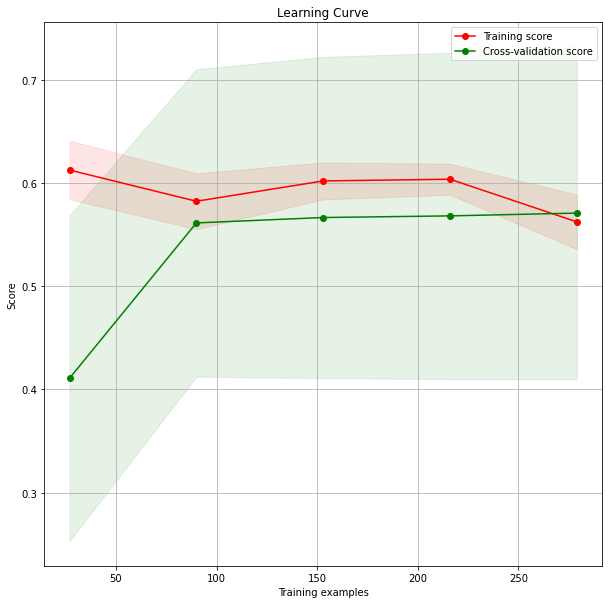

In [178]:
# 3-5-1. cv score 시각화 (cv = KFold(n_splits=10, shuffle=True, random_state=42)

import scikitplot as skplt

skplt.estimators.plot_learning_curve(model, x_train_std, y_train, figsize = (10,10), cv = cv)
plt.show()

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

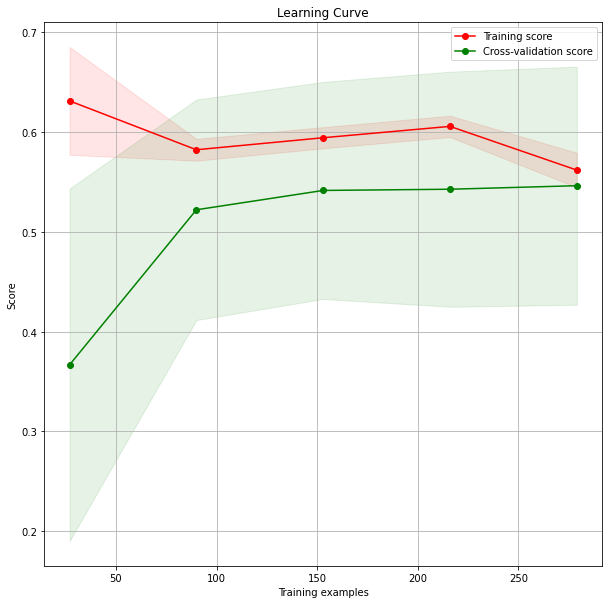

In [179]:
# 3-5-2. cv score 시각화 (cv = 10)

skplt.estimators.plot_learning_curve(model, x_train_std, y_train, figsize = (10,10), cv = 10)
plt.show()

In [180]:
model.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [181]:
# 3-6. 모형활용

pred = model.predict(x_test_std)
pred

array([47.53838562, 41.77927162, 43.89526122, 40.75047426, 29.8251794 ,
       42.96476016, 45.93557005, 45.85668077, 24.52413552, 52.01145487,
       31.80911997, 34.19520959, 38.95398382, 24.62775613, 35.71677467,
       32.45727107, 42.12161179, 46.72416886, 31.07084081, 44.56388123,
        1.80041717, 33.1442961 , 47.62841251, 43.52591333, 13.64325696,
       40.7150743 , 14.29275036, 43.89526122, 36.17923135, 37.91124001,
       11.20033634, 38.61961477, 37.95509237, 28.77462877, 45.9196403 ,
       31.27400154, 52.19552985, 14.72970227, 46.99162978, 40.6770754 ,
       36.118256  , 40.45289393, 48.54313346, 39.59846231, 41.83186447,
       48.25564937, 45.22372802, 24.16857648, 49.79366417, 48.30063936,
       47.53838562, 48.42758599, 41.02720897, 42.60147958, 36.26148476,
       14.70340584, 35.14333732, 36.60894387, 29.74629012, 45.85668077,
       33.14235582, 32.19990634, 14.70340584, 11.41372152,  8.12277346,
       33.17059252, 29.93235392, 45.4643237 , 34.06236213, 30.64

<br/>
<br/>

## 모형평가

In [182]:
# 4-1. 모형 평가 - RMSE

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
print(mse)
RMSE = np.sqrt(mse)
print('RMSE : ', RMSE)

# RMSE가 너무 높다 -> 과대적합 가능성 존재

66.5021751683685
RMSE :  8.15488658218914


In [183]:
# 4-2. 모형평가 - r2 score

print('결정계수 : %.2f' %r2_score(y_test, pred))

결정계수 : 0.58


In [184]:
# 4-3. 모형 저장
import joblib

joblib.dump(model, '1111_workshop')

['1111_workshop']

### 모형평가 결과
- RMSE가 너무 높다. 따라서 과대적합 가능성이 존재
- R2 score도 모형을 충분히 설명한다고 하기엔 낮다.
- 다른 모델로 학습을 해보자.

<br/>
<br/>


## 여기부터는 다양한 try

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 다항회귀

In [188]:
# 3-1. 정규화 - 이전 정규화 셋 그대로 사용
'''
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std.mean())
print("x_train_std std: ",x_train_std.std())

print("x_test_std mean: ",x_test_std.mean())
print("x_test_std std: ",x_test_std.std())
'''

'\nfrom sklearn.preprocessing import StandardScaler\nstdsc = StandardScaler()\n\nx_train_std = stdsc.fit_transform(X_train)\nx_test_std = stdsc.transform(X_test)\n\n\nprint("x_train_std mean : ",x_train_std.mean())\nprint("x_train_std std: ",x_train_std.std())\n\nprint("x_test_std mean: ",x_test_std.mean())\nprint("x_test_std std: ",x_test_std.std())\n'

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_fts = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_fts.fit_transform(x_train_std)
X_poly

array([[-1.15570946, -0.80949449,  0.9651532 , ...,  0.93152071,
        -0.930527  ,  0.92953436],
       [-1.02286601, -0.78195826,  1.6359996 , ...,  2.67649469,
         0.63283621,  0.14962916],
       [-0.96972863,  0.71656608, -1.04738599, ...,  1.09701741,
         1.50324395,  2.05989655],
       ...,
       [-0.56234204, -0.65058374, -1.04738599, ...,  1.09701741,
        -0.42776834,  0.16680296],
       [-1.11142831, -0.64484787,  0.62973   , ...,  0.39655988,
         0.32015231,  0.25846665],
       [-1.42139636, -0.69839093,  0.62973   , ...,  0.39655988,
        -0.19058747,  0.09159672]])

In [138]:
model5 = LinearRegression()

model5.fit(X_poly, y_train)

LinearRegression()

In [139]:
x_test_poly = poly_fts.transform(x_test_std)
x_test_poly

array([[-1.42139636e+00, -6.98390925e-01,  6.29730005e-01, ...,
         3.96559879e-01, -1.90587473e-01,  9.15967213e-02],
       [-3.49792520e-01, -4.56390597e-01,  2.94306806e-01, ...,
         8.66164963e-02, -1.02254245e-01,  1.20715234e-01],
       [-1.51881489e+00, -6.33216739e-01, -1.04738599e+00, ...,
         1.09701741e+00, -4.44523326e-01,  1.80125662e-01],
       ...,
       [ 1.57200941e+00, -3.95775530e-01, -4.11163921e-02, ...,
         1.69055770e-03, -1.76326588e-03,  1.83910112e-03],
       [-2.08092838e-01, -5.36588817e-01,  6.29730005e-01, ...,
         3.96559879e-01, -3.91559045e-01,  3.86621274e-01],
       [ 1.63868825e-01, -3.74506815e-02, -1.38280919e+00, ...,
         1.91216124e+00,  6.55198402e-01,  2.24502482e-01]])

In [140]:
poly_pred = model5.predict(x_test_poly)
poly_pred

array([52.23983489, 38.99743931, 53.84788687, 43.41218979, 20.66844814,
       41.72858842, 46.39558877, 46.25798536, 18.94966485, 54.51771077,
       25.0271953 , 27.84563283, 38.2128633 , 19.08376142, 37.80003274,
       25.56672355, 43.12926021, 52.46259542, 20.41924869, 42.68026499,
       25.83329784, 24.59291793, 50.45970933, 42.2629214 , 20.850996  ,
       43.41316482, 19.30225915, 53.84788687, 43.81561672, 45.40536632,
       19.08400121, 34.4895322 , 39.85780465, 20.98338985, 44.20915827,
       36.16986713, 55.02541825, 19.86257791, 41.17653594, 47.60289624,
       41.90657361, 37.94479578, 47.77372844, 39.7172447 , 39.08794782,
       47.827016  , 42.16496701, 19.54365482, 56.28589559, 47.88932353,
       52.23983489, 52.648065  , 39.06211573, 40.80435751, 35.7088779 ,
       19.84378387, 37.7554355 , 36.21309894, 20.63006395, 46.25798536,
       25.28589919, 28.89481436, 19.84378387, 19.00163566, 11.11663487,
       24.61909057, 22.08192768, 42.24213809, 39.18701274, 23.09

In [141]:
model5.score(x_test_poly, y_test)

0.6782296498633404

In [147]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model5, X_poly, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.27331196355315013
1번째 교차 검증 정확도 : 0.6322879632533921
2번째 교차 검증 정확도 : 0.7072531794611246
3번째 교차 검증 정확도 : 0.6106558961226184
4번째 교차 검증 정확도 : 0.7715190231028094
5번째 교차 검증 정확도 : 0.7306729142556905
6번째 교차 검증 정확도 : 0.8298589177468468
7번째 교차 검증 정확도 : 0.6588539476849428
8번째 교차 검증 정확도 : 0.7695672068327449
9번째 교차 검증 정확도 : 0.6463492152091532
최종 교차 검증 정확도 : 0.6630330227222474


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

(-2.0, 1.0)

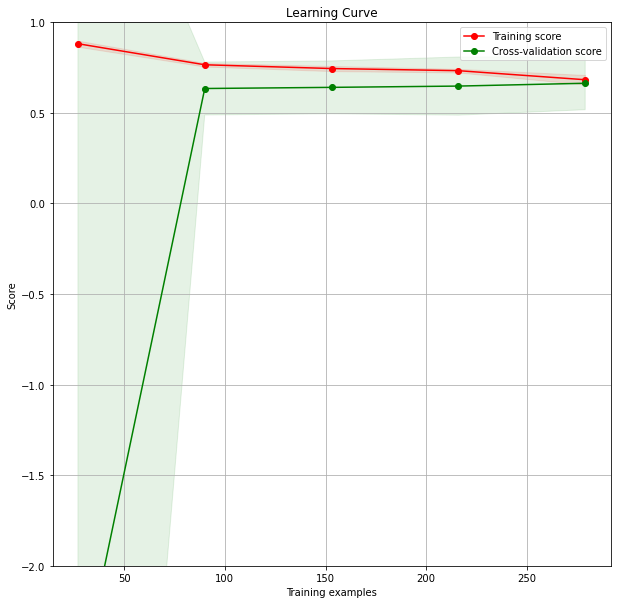

In [155]:
# 3-5-2. cv score 시각화 (cv = 10)

skplt.estimators.plot_learning_curve(model5, X_poly, y_train, figsize = (10,10), cv = cv)
plt.ylim(-2, 1)
plt.show()

In [186]:
# 3-6. 모형활용

pred2 = model5.predict(x_test_poly)
pred2

array([52.23983489, 38.99743931, 53.84788687, 43.41218979, 20.66844814,
       41.72858842, 46.39558877, 46.25798536, 18.94966485, 54.51771077,
       25.0271953 , 27.84563283, 38.2128633 , 19.08376142, 37.80003274,
       25.56672355, 43.12926021, 52.46259542, 20.41924869, 42.68026499,
       25.83329784, 24.59291793, 50.45970933, 42.2629214 , 20.850996  ,
       43.41316482, 19.30225915, 53.84788687, 43.81561672, 45.40536632,
       19.08400121, 34.4895322 , 39.85780465, 20.98338985, 44.20915827,
       36.16986713, 55.02541825, 19.86257791, 41.17653594, 47.60289624,
       41.90657361, 37.94479578, 47.77372844, 39.7172447 , 39.08794782,
       47.827016  , 42.16496701, 19.54365482, 56.28589559, 47.88932353,
       52.23983489, 52.648065  , 39.06211573, 40.80435751, 35.7088779 ,
       19.84378387, 37.7554355 , 36.21309894, 20.63006395, 46.25798536,
       25.28589919, 28.89481436, 19.84378387, 19.00163566, 11.11663487,
       24.61909057, 22.08192768, 42.24213809, 39.18701274, 23.09

In [187]:
# 4-1. 모형 평가 - RMSE

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred2)
print(mse)
RMSE = np.sqrt(mse)
print('RMSE : ', RMSE)

51.27283796652931
RMSE :  7.160505426750915


### 이전보단 RMSE가 낮아졌지만 여전히 과대적합이 발생하고 있다.

<br/>
<br/>
<br/>

### L2정규화 - 릿지 회귀 사용해보자.

In [195]:
model6 = Ridge(alpha = 0.001, max_iter = 1000)

model6.fit(X_poly, y_train)

Ridge(alpha=0.001, max_iter=1000)

In [196]:
x_test_ridge = poly_fts.transform(x_test_std)
x_test_ridge

array([[-1.42139636e+00, -6.98390925e-01,  6.29730005e-01, ...,
         3.96559879e-01, -1.90587473e-01,  9.15967213e-02],
       [-3.49792520e-01, -4.56390597e-01,  2.94306806e-01, ...,
         8.66164963e-02, -1.02254245e-01,  1.20715234e-01],
       [-1.51881489e+00, -6.33216739e-01, -1.04738599e+00, ...,
         1.09701741e+00, -4.44523326e-01,  1.80125662e-01],
       ...,
       [ 1.57200941e+00, -3.95775530e-01, -4.11163921e-02, ...,
         1.69055770e-03, -1.76326588e-03,  1.83910112e-03],
       [-2.08092838e-01, -5.36588817e-01,  6.29730005e-01, ...,
         3.96559879e-01, -3.91559045e-01,  3.86621274e-01],
       [ 1.63868825e-01, -3.74506815e-02, -1.38280919e+00, ...,
         1.91216124e+00,  6.55198402e-01,  2.24502482e-01]])

In [197]:
model6.score(x_test_poly, y_test)

0.6782308819608318

### 여전히 설명력이 충분하지 않다.

<br/>
<br/>
<br/>

### 특성량을 줄여보자. - house age 제외( 상관계수 절댓값 가장 낮다)

In [207]:
# 2-9 홀드아웃

from sklearn.model_selection import train_test_split

# 사용할 특징량 추출
tych = estate.astype({'house_price' : 'int'})

# transaction_date 컬럼 제외
x2 = tych.iloc[:,2:5]
y = tych.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.25, random_state = 42)

In [208]:
# 3-1. 정규화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std2 = stdsc.fit_transform(X_train)
x_test_std2 = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std2.mean())
print("x_train_std std: ",x_train_std2.std())

print("x_test_std mean: ",x_test_std2.mean())
print("x_test_std std: ",x_test_std2.std())

x_train_std mean :  9.224640167616677e-14
x_train_std std:  0.9999999999999999
x_test_std mean:  -0.03127865148774662
x_test_std std:  1.0009388140471398


In [209]:
# 3-2. 모형 구축 - 단순선형회귀 선택

from sklearn.linear_model import LinearRegression

model7 = LinearRegression()

In [210]:
# 3-3. 모형 실행

model7.fit(x_train_std2, y_train)

LinearRegression()

In [211]:
model7.score(x_test_std2, y_test)

0.5126176593022478

In [206]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model7, x_train_std2, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.20970647457217806
1번째 교차 검증 정확도 : 0.44927954919152735
2번째 교차 검증 정확도 : 0.5422179727006896
3번째 교차 검증 정확도 : 0.3230902561790575
4번째 교차 검증 정확도 : 0.6192653479715837
5번째 교차 검증 정확도 : 0.7537661297555888
6번째 교차 검증 정확도 : 0.6142679776024308
7번째 교차 검증 정확도 : 0.5196142655251454
8번째 교차 검증 정확도 : 0.609133923923443
9번째 교차 검증 정확도 : 0.5662020260990415
최종 교차 검증 정확도 : 0.5206543923520686


### 여전히 설명력이 충분하지 않다.

<br/>
<br/>
<br/>

### 다른 특성량을 줄여보자. - distance_nearest_MRT 제외(다른 특성량과의 상관계수가 높은 편)

In [221]:
# 2-9 홀드아웃

from sklearn.model_selection import train_test_split

# 사용할 특징량 추출
tych = estate.astype({'house_price' : 'int'})

# transaction_date 컬럼 제외
x3 = tych.iloc[:,[1,3,4]]
y = tych.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size = 0.25, random_state = 42)

In [222]:
# 3-1. 정규화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

x_train_std3 = stdsc.fit_transform(X_train)
x_test_std3 = stdsc.transform(X_test)


print("x_train_std mean : ",x_train_std3.mean())
print("x_train_std std: ",x_train_std3.std())

print("x_test_std mean: ",x_test_std3.mean())
print("x_test_std std: ",x_test_std3.std())

x_train_std mean :  9.226168216510785e-14
x_train_std std:  1.0
x_test_std mean:  0.0042958013660406085
x_test_std std:  0.984070540454913


In [223]:
# 3-2. 모형 구축 - 단순선형회귀 선택

from sklearn.linear_model import LinearRegression

model8 = LinearRegression()

In [224]:
# 3-3. 모형 실행

model8.fit(x_train_std3, y_train)

LinearRegression()

In [225]:
model8.score(x_test_std3, y_test)

0.5146604640659334

### 여전히 설명력이 충분하지 않다

<br/>
<br/>
<br/>

### 어떤 차원을 축소할지 알아보기 위해 PCA(주성분분석)를 해보자.

In [239]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x_train_std)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

principalDf

,principal component1,principal component2
0,-0.507397,-1.411934
1,-1.618504,-0.841661
2,1.825287,-0.335772
3,1.371303,-0.147650
4,-0.664113,0.064680
...,...,...
305,-0.263346,0.593635
306,-1.500719,-0.450991
307,-0.029518,0.953889
308,-1.031830,-0.077597


In [233]:
# 2개의 성분들이 모형을 얼마나 설명하는지
pca.explained_variance_ratio_

# 공분산 행렬의 eigenvalue
pca.explained_variance_

array([0.69297552, 0.18763272])

array([2.08565447, 0.56471985])

In [230]:
sum(pca.explained_variance_ratio_)

0.8806082429454687

In [240]:
X_train_pca = pca.transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

In [241]:
# 3-2. 모형 구축 - 단순선형회귀 선택

from sklearn.linear_model import LinearRegression

model9 = LinearRegression()

In [243]:
# 3-3. 모형 실행

model9.fit(X_train_pca, y_train)

LinearRegression()

In [245]:
model9.score(X_test_pca, y_test)

0.5122348795696876

In [198]:
# 3-6. 모형활용

pred3 = model6.predict(x_test_poly)
pred3

array([52.23969437, 38.99739628, 53.84778841, 43.412102  , 20.66876825,
       41.72868512, 46.39543282, 46.25782969, 18.94979607, 54.51761545,
       25.02736805, 27.84594441, 38.21292488, 19.08388453, 37.80008653,
       25.56680553, 43.12930331, 52.46244266, 20.4197852 , 42.68024709,
       25.83358126, 24.59312765, 50.45959355, 42.26282797, 20.85089321,
       43.41307606, 19.30212732, 53.84778841, 43.81543809, 45.40529939,
       19.0837877 , 34.48967053, 39.85774564, 20.98348402, 44.20905013,
       36.16988894, 55.02532427, 19.86245479, 41.17688936, 47.60288176,
       41.90651554, 37.94471496, 47.77374582, 39.71715798, 39.08790498,
       47.82693032, 42.16506742, 19.5435411 , 56.28566914, 47.88934456,
       52.23969437, 52.64794696, 39.06228401, 40.80434348, 35.70878866,
       19.84366071, 37.75541254, 36.21301517, 20.6303843 , 46.25782969,
       25.28621491, 28.89486256, 19.84366071, 19.00142432, 11.11688298,
       24.61930021, 22.08202209, 42.24234395, 39.18695626, 23.09

In [199]:
# 4-1. 모형 평가 - RMSE

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred3)
print(mse)
RMSE = np.sqrt(mse)
print('RMSE : ', RMSE)

51.2726416366468
RMSE :  7.160491717518204


In [189]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = Pipeline(
        [
            ("polynomial_features", poly_fts),
            ("linear_regression", model5),
        ]
    )
    pipeline.fit(X_poly, y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X_poly, y_train, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_poly, pipeline.predict(x_test_poly, label="Model")
    plt.plot(X_poly, x_test_poly, label="True function")
    plt.scatter(X_poly, y_train, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

SyntaxError: invalid syntax (3869132243.py, line 25)

<Figure size 1008x360 with 0 Axes>

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 1\nMSE = 4.08e-01(+/- 4.25e-01)')

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 4\nMSE = 4.32e-02(+/- 7.08e-02)')

[]

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(0.0, 1.0)

(-2.0, 2.0)

Text(0.5, 1.0, 'Degree 15\nMSE = 1.83e+08(+/- 5.48e+08)')

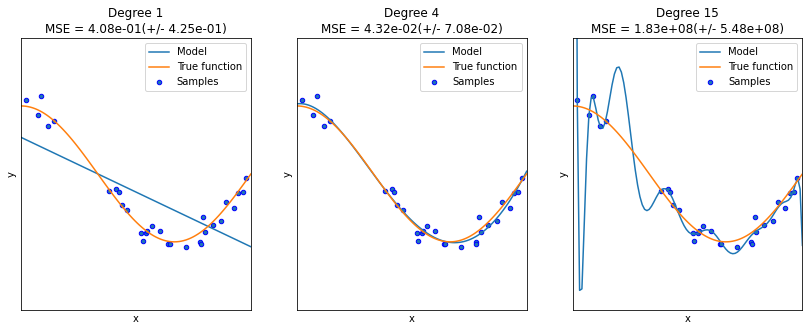

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## 그 외의 선형 모형들

In [103]:
# 3-2. 모형 구축

from sklearn.linear_model import Ridge

model2 = Ridge()

In [104]:
# 3-3. 모형 실행

model2.fit(x_train_std, y_train)

Ridge()

In [105]:
model2.score(x_test_std, y_test)

0.5827473826725067

In [99]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model2, x_train_std, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.20233138322032473
1번째 교차 검증 정확도 : 0.5149915361569068
2번째 교차 검증 정확도 : 0.5862052991378639
3번째 교차 검증 정확도 : 0.46175200571291874
4번째 교차 검증 정확도 : 0.7324065956066095
5번째 교차 검증 정확도 : 0.7746255694185978
6번째 교차 검증 정확도 : 0.7097020462249775
7번째 교차 검증 정확도 : 0.49805687333119997
8번째 교차 검증 정확도 : 0.6909162249760517
9번째 교차 검증 정확도 : 0.5378443750243425
최종 교차 검증 정확도 : 0.5708831908809794


In [101]:
# 3-2. 모형 구축

from sklearn.linear_model import ElasticNet

model3 = ElasticNet()

In [102]:
# 3-3. 모형 실행

model3.fit(x_train_std, y_train)

ElasticNet()

In [106]:
model3.score(x_test_std, y_test)

0.5441377522921227

In [107]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model3, x_train_std, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.16799914901818513
1번째 교차 검증 정확도 : 0.5325652886716318
2번째 교차 검증 정확도 : 0.5707311044293838
3번째 교차 검증 정확도 : 0.45469410590150505
4번째 교차 검증 정확도 : 0.6607585112474714
5번째 교차 검증 정확도 : 0.6796826467427952
6번째 교차 검증 정확도 : 0.623426671179532
7번째 교차 검증 정확도 : 0.4962903559010534
8번째 교차 검증 정확도 : 0.636814316567189
9번째 교차 검증 정확도 : 0.4985931886176138
최종 교차 검증 정확도 : 0.532155533827636


In [112]:
# 3-2. 모형 구축

from sklearn.linear_model import Perceptron

model4 = Perceptron(penalty = 'l2', max_iter = 10000)

Perceptron(*,
penalty=None,
alpha=0.0001,
l1_ratio=0.15,
fit_intercept=True,
max_iter=1000,
tol=0.001,
shuffle=True,
verbose=0,
eta0=1.0,
n_jobs=None,
random_state=0,
early_stopping=False,
validation_fraction=0.1,
n_iter_no_change=5,
class_weight=None,
warm_start=False)

In [113]:
# 3-3. 모형 실행

model4.fit(x_train_std, y_train)

Perceptron(max_iter=10000, penalty='l2')

In [121]:
model4.score(x_test_std, y_test)

0.057692307692307696

In [122]:
# 3-4. 일반화작업 - 교차검증(corss validation) # 10Fold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
result = cross_val_score(model4, x_train_std, y_train, cv=cv)
fin_result = np.mean(result)

type(result)
for i, _ in enumerate(result):
    print('{}번째 교차 검증 정확도 : {}'.format(i, _))

print('최종 교차 검증 정확도 : {}'.format(fin_result))

numpy.ndarray

0번째 교차 검증 정확도 : 0.06451612903225806
1번째 교차 검증 정확도 : 0.06451612903225806
2번째 교차 검증 정확도 : 0.06451612903225806
3번째 교차 검증 정확도 : 0.0
4번째 교차 검증 정확도 : 0.03225806451612903
5번째 교차 검증 정확도 : 0.0967741935483871
6번째 교차 검증 정확도 : 0.03225806451612903
7번째 교차 검증 정확도 : 0.0967741935483871
8번째 교차 검증 정확도 : 0.03225806451612903
9번째 교차 검증 정확도 : 0.12903225806451613
최종 교차 검증 정확도 : 0.061290322580645165
